## Issue: reading a POP dataset, longitude and latitude are 2D arrays

POP output is typically on a displaced-pole grid (the grid is rotated so that the north pole is centered in Greenland) - computation can't be done on a regular lat-lon grid because the north pole is over ocean and we don't want grid convergence in the computational domain. That means we don't want to plot according to the `nlat` and `nlon` dimensions, we want the latitude to be `TLAT(nlat,nlon)` and the longitude to be `TLONG(nlat,nlon)`.

#### Environment

There's an `environment.yaml` file to create a conda environment (I call it "canopy-issue") with the following:

* python 3.6.6
* Cartopy 0.16.0
* matplotlib 2.2.2
* xarray 0.10.8
* jupyterlab 0.33.4

Those were the latest versions available of each package as of Aug 2, 2018.

#### Notebook walk-through

Prior to creating this ticket, I created a dataset that contains a 2D variable (`SSH`: sea surface height) on the native POP grid. The dataset also includes the 2D variables `TLAT` and `TLON`, and I read the whole thing in with `xarray`.

In [1]:
import xarray as xr

ds = xr.open_dataset('./POP_SSH.nc')

### Plotting on POP's grid

The plot on POP's native grid looks okay:

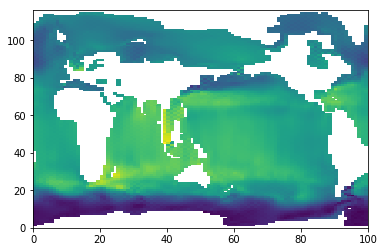

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.pcolormesh(ds.SSH)

### Plotting on lat-lon grid

When I specify `TLONG` and `TLAT` for the `x` and `y` axes, respectively, things go awry:

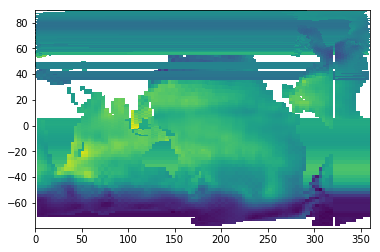

In [3]:
plt.pcolormesh(ds.TLONG, ds.TLAT, ds.SSH)